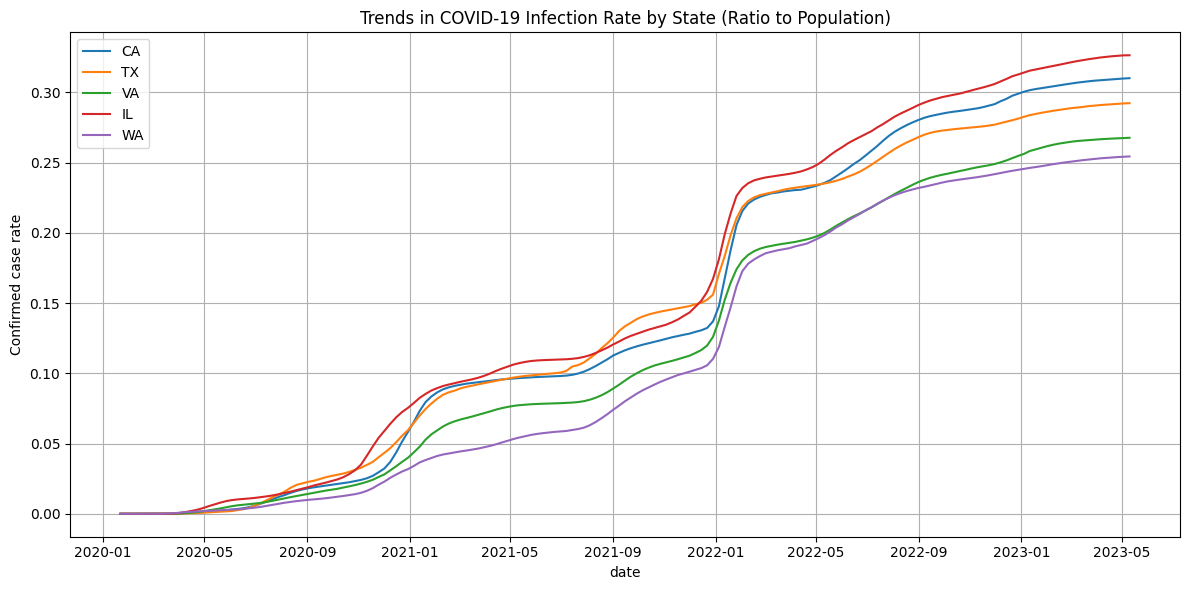

가장 코로나 상황이 완화된 주는: WA


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 인구 수
state_populations = {
    'CA': 39500000,
    'TX': 29100000,
    'VA': 8631000,
    'IL': 12670000,
    'WA': 7694000
}

# USA 전체 데이터 로드
usa_df = pd.read_csv('usa-coviddata.csv')

# 주 필터링
target_states = list(state_populations.keys())
filtered_df = usa_df[usa_df['state'].isin(target_states)]

# 비율 저장용
ratio_data = {}

# 주별 감염률 계산
for state, population in state_populations.items():
    state_df = filtered_df[filtered_df['state'] == state].copy()
    state_df['end_date'] = pd.to_datetime(state_df['end_date'])
    state_df.sort_values('end_date', inplace=True)
    state_df.set_index('end_date', inplace=True)
    state_df['ratio'] = state_df['tot_cases'] / population
    ratio_data[state] = state_df['ratio']

# 하나의 DataFrame으로 합치기
compare_df_states = pd.DataFrame(ratio_data)

# 시각화
plt.figure(figsize=(12, 6))
for state in compare_df_states.columns:
    plt.plot(compare_df_states.index, compare_df_states[state], label=state)

plt.title('Trends in COVID-19 Infection Rate by State (Ratio to Population)')
plt.xlabel('date')
plt.ylabel('Confirmed case rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 감염률 가장 낮은 주
latest = compare_df_states.iloc[-1]
best_state = latest.idxmin()
print(f"가장 코로나 상황이 완화된 주는: {best_state}")
